In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib notebook


In [2]:
#CREATING FUNCTION TO IMPORT DATASET, CONSTRUCT DATAFRAME, AND PROVIDE BASIC STATISTICAL SUMMARY
apiKey = '67OE5CNSPKTB1OJO'

def stockAnalysis(ticker, startDate, endDate):
    '''CREATING FUNCTION TO IMPORT DATASET, CONSTRUCT DATAFRAME, AND PROVIDE BASIC STATISTICAL SUMMARY'''
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol='+ticker+'&outputsize=full&apikey='+apiKey
    resp = requests.get(url)
    fulldf = resp.json()
    
    '''CONSTRUCTING DATAFRAME FOR S&P 500 STOCK PRICES'''
    df = pd.DataFrame(fulldf["Time Series (Daily)"]) #constructing a DataFrame using the JSON
    df = df.T
    df_price = pd.DataFrame(df.loc[endDate:startDate],columns=['5. adjusted close']) #constructing a new DataFrame with a specific date range 
    df_price = df_price.iloc[::-1]
    df_price.columns = [ticker + ' Adjusted Closing Price']
    print('First 5 rows: ', df_price.head(), '\n')
    
    '''RETRIEVING MEAN, STANDARD DEVIATION, MIN, MAX FOR STOCK PRICE'''
    df_price = df_price.astype(float)
    print('Statistic summary: ', df_price.describe(), '\n')
    
    '''RETRIEVING VARIANCE FOR STOCK PRICE'''
    print('Price Variance: ', df_price.values.var(),'\n')
    
    df_x = df_price.pct_change().dropna()
    df_x.columns = [ticker+' Adjusted Closing Price % Change']
    print('First 5 rows: ', df_x.head(), '\n')

    '''PLOTTING THE DAILY STOCK PRICE PERCENT CHANGE'''
    ax = df_x.plot.bar()
    ticks_to_use = np.arange(0,len(df_x),20)
    labels = [df_x.index[i] for i in ticks_to_use]
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels)
    
    '''RETRIEVING MEAN, STANDARD DEVIATION, MIN, MAX FOR DAILY STOCK PRICE % CHANGE'''
    print('Statistic summary for : ', df_x.describe(), '\n')
    
    '''RETRIEVING VARIANCE FOR STOCK PRICE % CHANGE'''

    print('Price % Change Variance: ', df_x.values.var())
    return df_x

In [3]:
#CREATING FUNCTION TO PLOT SAMPLES AND LINEAR MODEL FOR SELECTED STOCK VS. SP500
def stockReg(df1,df2, ticker1, ticker2):
    df_combined=pd.concat([df1, df2],axis=1)
    df_combined.columns=['x','y']
    df_plot= sb.regplot('x','y',data=df_combined)
    plt.xlabel(ticker1)
    plt.ylabel(ticker2)
    reg=LinearRegression()

    reg.fit(df_combined[['x']],df_combined['y'])
    y_pred=reg.predict(df1)
    newDf=pd.DataFrame({'Actual':df2.values.flatten(),'Predicted':y_pred.flatten()})

    #PRINTING INTERCEPT, COEFFICIENT, R SQUARED AND MEAN SQUARED ERROR
    print('Intercept: ', reg.intercept_)
    print('Coefficient: ', reg.coef_)
    print('R Squared:', metrics.r2_score(df2.values, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(df2.values, y_pred)) 
    return df_combined

## S&P 500 Daily Price Analysis 

First 5 rows:             SPX Adjusted Closing Price
2018-01-02                  2695.8101
2018-01-03                  2713.0601
2018-01-04                  2723.9900
2018-01-05                  2743.1499
2018-01-08                  2747.7100 

Statistic summary:         SPX Adjusted Closing Price
count                  251.000000
mean                  2746.214183
std                    100.409310
min                   2351.100100
25%                   2690.295050
50%                   2743.149900
75%                   2814.755000
max                   2930.750000 

Price Variance:  10041.862109358604 

First 5 rows:              SPX Adjusted Closing Price % Change
2018-01-03                             0.006399
2018-01-04                             0.004029
2018-01-05                             0.007034
2018-01-08                             0.001662
2018-01-09                             0.001303 

Statistic summary for :         SPX Adjusted Closing Price % Change
count           

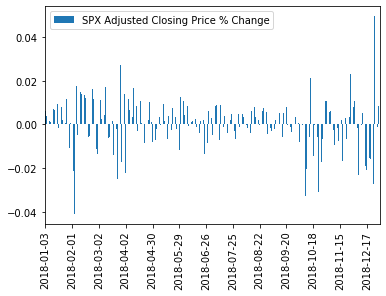

In [4]:
spxDf = stockAnalysis('SPX', '2018-01-01', '2018-31-12')

## Apple Stock Daily Price Analysis 

First 5 rows:             AAPL Adjusted Closing Price
2018-01-02                    167.1942
2018-01-03                    167.1650
2018-01-04                    167.9415
2018-01-05                    169.8536
2018-01-08                    169.2227 

Statistic summary:         AAPL Adjusted Closing Price
count                   251.000000
mean                    184.996877
std                      20.571795
min                     144.649900
25%                     168.964400
50%                     182.262100
75%                     203.710650
max                     227.826500 

Price Variance:  421.512690757235 

First 5 rows:              AAPL Adjusted Closing Price % Change
2018-01-03                             -0.000175
2018-01-04                              0.004645
2018-01-05                              0.011386
2018-01-08                             -0.003714
2018-01-09                             -0.000115 

Statistic summary for :         AAPL Adjusted Closing Price % Cha

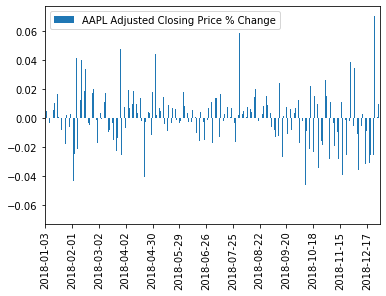

In [5]:
aaplDf = stockAnalysis('AAPL', '2018-01-01', '2018-31-12')

Intercept:  -0.0001757939808878096
Coefficient:  [0.44211194]
R Squared: 0.5545505979937544
Mean Squared Error: 5.12662811165861e-05


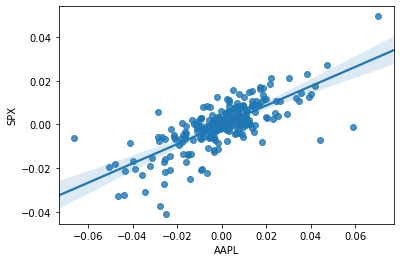

In [6]:
aaplCom = stockReg(aaplDf, spxDf, 'AAPL', 'SPX')

## MSFT Daily Stock Prices Analysis

First 5 rows:             MSFT Adjusted Closing Price
2018-01-02                     83.2471
2018-01-03                     83.6345
2018-01-04                     84.3706
2018-01-05                     85.4167
2018-01-08                     85.5038 

Statistic summary:         MSFT Adjusted Closing Price
count                   251.000000
mean                     98.754433
std                       8.145587
min                      82.336700
25%                      91.307450
50%                      99.004100
75%                     105.693650
max                     113.419400 

Price Variance:  66.08624918659575 

First 5 rows:              MSFT Adjusted Closing Price % Change
2018-01-03                              0.004654
2018-01-04                              0.008801
2018-01-05                              0.012399
2018-01-08                              0.001020
2018-01-09                             -0.000680 

Statistic summary for :         MSFT Adjusted Closing Price % Ch

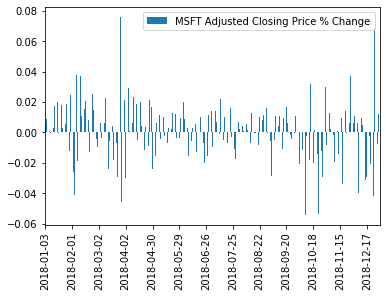

In [7]:
msftDf = stockAnalysis('MSFT', '2018-01-01', '2018-12-31')

Intercept:  -0.0007040654363904482
Coefficient:  [0.5263046]
R Squared: 0.7627662617276187
Mean Squared Error: 2.7302969679236392e-05


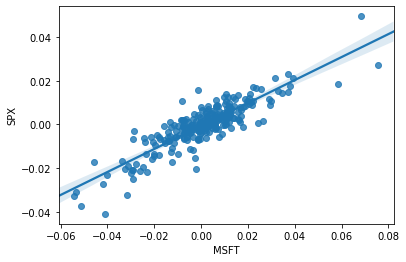

In [8]:
msftCom = stockReg(msftDf, spxDf, 'MSFT', 'SPX')


## Target Daily Stock Prices

First 5 rows:             TGT Adjusted Closing Price
2018-01-02                    63.3663
2018-01-03                    62.9353
2018-01-04                    61.6986
2018-01-05                    62.3544
2018-01-08                    62.9447 

Statistic summary:         TGT Adjusted Closing Price
count                  251.000000
mean                    73.039222
std                      6.729098
min                     59.248800
25%                     67.505750
50%                     72.098800
75%                     78.815850
max                     85.718400 

Price Variance:  45.10035186210948 

First 5 rows:              TGT Adjusted Closing Price % Change
2018-01-03                            -0.006802
2018-01-04                            -0.019650
2018-01-05                             0.010629
2018-01-08                             0.009467
2018-01-09                             0.029175 

Statistic summary for :         TGT Adjusted Closing Price % Change
count            

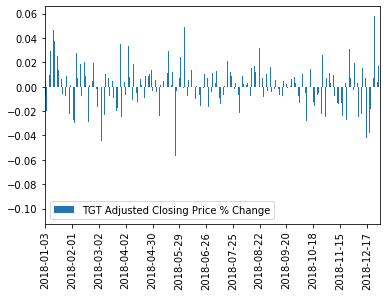

In [9]:
tgtDf = stockAnalysis('TGT', '2018-01-01', '2018-12-31')

Intercept:  -0.0002945566441665033
Coefficient:  [0.30734566]
R Squared: 0.25563328638389815
Mean Squared Error: 8.566834532092909e-05


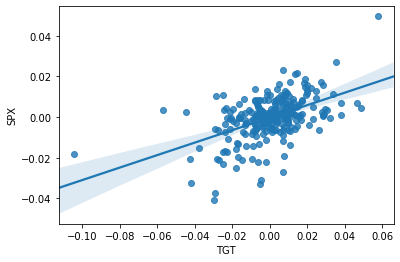

In [10]:
tgtCom = stockReg(tgtDf, spxDf, 'TGT', 'SPX')

## Gold Daily Price Analysis 

First 5 rows:             GLD Adjusted Closing Price
2018-01-02                   125.1500
2018-01-03                   124.8200
2018-01-04                   125.4600
2018-01-05                   125.3300
2018-01-08                   125.3100 

Statistic summary:         GLD Adjusted Closing Price
count                  251.000000
mean                   120.177331
std                      5.233800
min                    111.100000
25%                    115.660000
50%                    119.660000
75%                    125.350000
max                    128.830000 

Price Variance:  27.28352554403898 

First 5 rows:              GLD Adjusted Closing Price % Change
2018-01-03                            -0.002637
2018-01-04                             0.005127
2018-01-05                            -0.001036
2018-01-08                            -0.000160
2018-01-09                            -0.004629 

Statistic summary for :         GLD Adjusted Closing Price % Change
count            

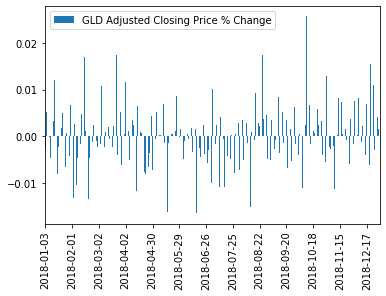

In [12]:
goldDf = stockAnalysis('GLD', '2018-01-01', '2018-12-31')

Intercept:  -0.00023950589169530233
Coefficient:  [-0.06114954]
R Squared: 0.0012067341055623793
Mean Squared Error: 0.00011495001703017087


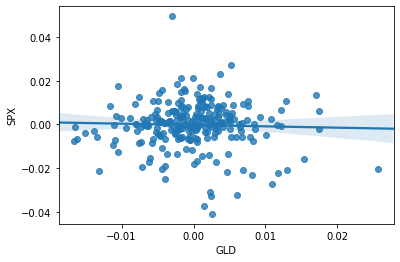

In [13]:
goldCom = stockReg(goldDf, spxDf, 'GLD', 'SPX')

## Treasury Bond Daily Price Analysis 

First 5 rows:             TLH Adjusted Closing Price
2018-01-02                   129.6403
2018-01-03                   129.8797
2018-01-04                   129.8605
2018-01-05                   129.6307
2018-01-08                   129.5350 

Statistic summary:         TLH Adjusted Closing Price
count                  251.000000
mean                   125.792470
std                      1.685797
min                    122.464200
25%                    124.673600
50%                    125.637200
75%                    126.984250
max                    130.718400 

Price Variance:  2.830590686318314 

First 5 rows:              TLH Adjusted Closing Price % Change
2018-01-03                             0.001847
2018-01-04                            -0.000148
2018-01-05                            -0.001770
2018-01-08                            -0.000738
2018-01-09                            -0.007762 

Statistic summary for :         TLH Adjusted Closing Price % Change
count            

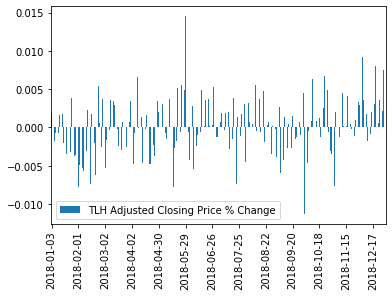

In [14]:
bondDf = stockAnalysis('TLH', '2018-01-01', '2018-12-31')

Intercept:  -0.00019325916261727787
Coefficient:  [-1.00260045]
R Squared: 0.11196675959487501
Mean Squared Error: 0.00010220276767336126


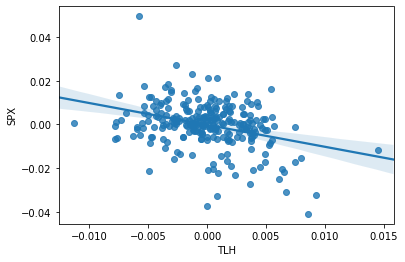

In [15]:
bondCom = stockReg(bondDf, spxDf, 'TLH', 'SPX')

# Correlation 

In [16]:
# Correlation Among the Assets vs. SP500

print('APPLE', '\n', aaplCom.corr(),'\n')
print('MICROSOFT', '\n', msftCom.corr(),'\n')
print('TARGET', '\n', tgtCom.corr(),'\n')
print('GOLD ETF', '\n', goldCom.corr(),'\n')
print('10 YEAR TREASURY BOND', '\n', bondCom.corr(),'\n')

APPLE 
           x         y
x  1.000000  0.744682
y  0.744682  1.000000 

MICROSOFT 
           x         y
x  1.000000  0.873365
y  0.873365  1.000000 

TARGET 
           x         y
x  1.000000  0.505602
y  0.505602  1.000000 

GOLD ETF 
           x         y
x  1.000000 -0.034738
y -0.034738  1.000000 

10 YEAR TREASURY BOND 
           x         y
x  1.000000 -0.334614
y -0.334614  1.000000 



### Conclusion: Microsoft is the most correlated and Gold is the least correlated 